In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
#READING THE DATA FROM DATASET
data=pd.read_csv('Data_Train.csv')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data.shape

(10683, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:

data = data.dropna(axis=0, subset=['Route'])

In [7]:
data.shape

(10682, 11)

In [8]:
data = data.dropna(axis=0, subset=['Total_Stops'])

In [9]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
data.shape

(10682, 11)

Extracting the day and month from the date

In [11]:

data['J_Day']=pd.to_datetime(data.Date_of_Journey,format="%d/%m/%Y").dt.day

In [12]:
data['J_month']=pd.to_datetime(data.Date_of_Journey,format="%d/%m/%Y").dt.month

In [13]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,J_Day,J_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [14]:
data=data.drop(['Date_of_Journey'],axis=1)

Spliting the dept hour,arrival hour and dept minute arrival minute

In [15]:
data["Dept_hour"]=pd.to_datetime(data["Dep_Time"]).dt.hour

In [16]:
data["Dept_min"]=pd.to_datetime(data["Dep_Time"]).dt.minute

droping the column Dep time 

In [17]:
data=data.drop(['Dep_Time'],axis=1)

In [18]:
data["Arrival_hour"]=pd.to_datetime(data["Arrival_Time"]).dt.hour

In [19]:
data["Arrival_min"]=pd.to_datetime(data["Arrival_Time"]).dt.minute

In [20]:
data=data.drop(['Arrival_Time'],axis=1)

In [21]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,J_Day,J_month,Dept_hour,Dept_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


SPLITING DURATION INTO DURATION HOURS AND DURATION MINUTE

In [22]:
d=list(data['Duration'])

for i in range(len(d)):
    if len(d[i].split()) !=2:
        if "h" in d[i]:
            d[i]=d[i].strip()+" 0m"
        else:
            d[i]="0h "+d[i].strip()
            
duration_hours=[]
duration_mins=[]
for i in range(len(d)):
    duration_hours.append(int(d[i].split(sep="h")[0]))

   
    duration_mins.append(int(d[i].split(sep="m")[0].split()[-1]))
       
    
    

In [23]:
data['duration_hours']=duration_hours
data['duration_mins']=duration_mins

In [24]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,J_Day,J_month,Dept_hour,Dept_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [25]:
data=data.drop(['Duration'],axis=1)

converting all the columns from string to numeric

In [26]:
data=pd.get_dummies(data=data,columns=['Airline','Source','Destination'],drop_first=True)
data.head()

,Route,Total_Stops,Additional_Info,Price,J_Day,J_month,Dept_hour,Dept_min,Arrival_hour,Arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


as route and total stops are related to each other so droping route 

In [27]:
data=data.drop(['Route'],axis=1)

In [28]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

from above we can see that maximum counts for Additional_Info have no information so droping Additional_info column

In [29]:
data=data.drop(['Additional_Info'],axis=1)
data.head()

,Total_Stops,Price,J_Day,J_month,Dept_hour,Dept_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,non-stop,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2 stops,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2 stops,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1 stop,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1 stop,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


CONVERTING TOTAL_STOPS DATA INTO NUMERIC

In [30]:
data['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [31]:
data.head()

,Total_Stops,Price,J_Day,J_month,Dept_hour,Dept_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [32]:
data.columns

Index(['Total_Stops', 'Price', 'J_Day', 'J_month', 'Dept_hour', 'Dept_min',
       'Arrival_hour', 'Arrival_min', 'duration_hours', 'duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

repeating the same code for test data which is in other csv file

In [33]:
#READING THE TEST DATA FROM DATASET
data_test=pd.read_csv('Test_set.csv')
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [34]:
data_test.shape

(2671, 10)

In [35]:
data_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [36]:
data_test['J_Day']=pd.to_datetime(data_test.Date_of_Journey,format="%d/%m/%Y").dt.day

In [37]:
data_test['J_month']=pd.to_datetime(data_test.Date_of_Journey,format="%d/%m/%Y").dt.month

In [38]:
data_test=data_test.drop(['Date_of_Journey'],axis=1)

In [39]:
data_test["Dept_hour"]=pd.to_datetime(data_test["Dep_Time"]).dt.hour

In [40]:
data_test["Dept_min"]=pd.to_datetime(data_test["Dep_Time"]).dt.minute

In [41]:
data_test=data_test.drop(['Dep_Time'],axis=1)

In [42]:
data_test["Arrival_hour"]=pd.to_datetime(data_test["Arrival_Time"]).dt.hour

In [43]:
data_test["Arrival_min"]=pd.to_datetime(data_test["Arrival_Time"]).dt.minute

In [44]:
data_test=data_test.drop(['Arrival_Time'],axis=1)

In [45]:
data_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,J_Day,J_month,Dept_hour,Dept_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [46]:
d2=list(data_test['Duration'])

for i in range(len(d2)):
    if len(d2[i].split()) !=2:
        if "h" in d2[i]:
            d2[i]=d2[i].strip()+" 0m"
        else:
            d2[i]="0h "+d2[i].strip()
            
duration_hours2=[]
duration_mins2=[]
for i in range(len(d2)):
    duration_hours2.append(int(d2[i].split(sep="h")[0]))

   
    duration_mins2.append(int(d2[i].split(sep="m")[0].split()[-1]))
       
    

In [47]:
data_test['duration_hours']=duration_hours2
data_test['duration_mins']=duration_mins2

In [48]:
data_test=data_test.drop(['Duration'],axis=1)

In [49]:
data_test=pd.get_dummies(data=data_test,columns=['Airline','Source','Destination'],drop_first=True)
data_test.head()

,Route,Total_Stops,Additional_Info,J_Day,J_month,Dept_hour,Dept_min,Arrival_hour,Arrival_min,duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,...,0,0,1,0,0,1,0,0,0,0
1,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,...,0,0,0,1,0,0,0,0,0,0
2,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,...,0,0,1,0,0,1,0,0,0,0
3,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,...,0,0,1,0,0,1,0,0,0,0
4,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,...,0,0,0,0,0,0,1,0,0,0


In [50]:
data_test=data_test.drop(['Route'],axis=1)

In [51]:
data_test['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [52]:
data_test=data_test.drop(['Additional_Info'],axis=1)
data_test.head()

,Total_Stops,J_Day,J_month,Dept_hour,Dept_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1 stop,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1 stop,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1 stop,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1 stop,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,non-stop,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [53]:
data_test['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [54]:
data_test.head()

,Total_Stops,J_Day,J_month,Dept_hour,Dept_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [55]:
data_test.columns

Index(['Total_Stops', 'J_Day', 'J_month', 'Dept_hour', 'Dept_min',
       'Arrival_hour', 'Arrival_min', 'duration_hours', 'duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [56]:
data_test['Airline_Trujet'] = pd.Series([0 for x in range(len(data_test.index))])

In [57]:
data_test.head()

,Total_Stops,J_Day,J_month,Dept_hour,Dept_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Trujet
0,1,6,6,17,30,4,25,10,55,0,...,0,1,0,0,1,0,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,1,0,0,1,0,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,1,0,0,0,0


finally both the data are cleaned

In [58]:
corr=data.corr()
corr

,Total_Stops,Price,J_Day,J_month,Dept_hour,Dept_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706,...,-0.020459,-0.234758,0.490170,0.032761,-0.260752,0.490170,-0.447390,-0.260752,-0.234758,-0.015302
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855,...,-0.000454,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.313417,-0.230755,-0.179223,0.189777
J_Day,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940,...,-0.020115,0.006611,0.100088,-0.060558,-0.014030,0.100088,0.002632,-0.014030,0.006611,-0.075254
J_month,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897,...,-0.019797,0.005650,0.139222,0.087177,-0.039352,0.139222,0.090490,-0.039352,0.005650,-0.453685
Dept_hour,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707,...,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
Dept_min,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485,...,-0.011380,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129
Arrival_hour,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309,...,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366
Arrival_min,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628,...,0.000314,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271
duration_hours,0.739916,0.508778,-0.022059,0.016141,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468,...,-0.016268,-0.186668,0.299819,0.123524,-0.233326,0.299819,-0.346192,-0.233326,-0.186668,0.004052
duration_mins,-0.136706,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000,...,0.004952,-0.098823,-0.154126,0.013761,-0.018761,-0.154126,0.218207,-0.018761,-0.098823,0.079866


HEATMAP FOR FINDING THE CORRELATION BETWEEN FEATURES AND LABEL 

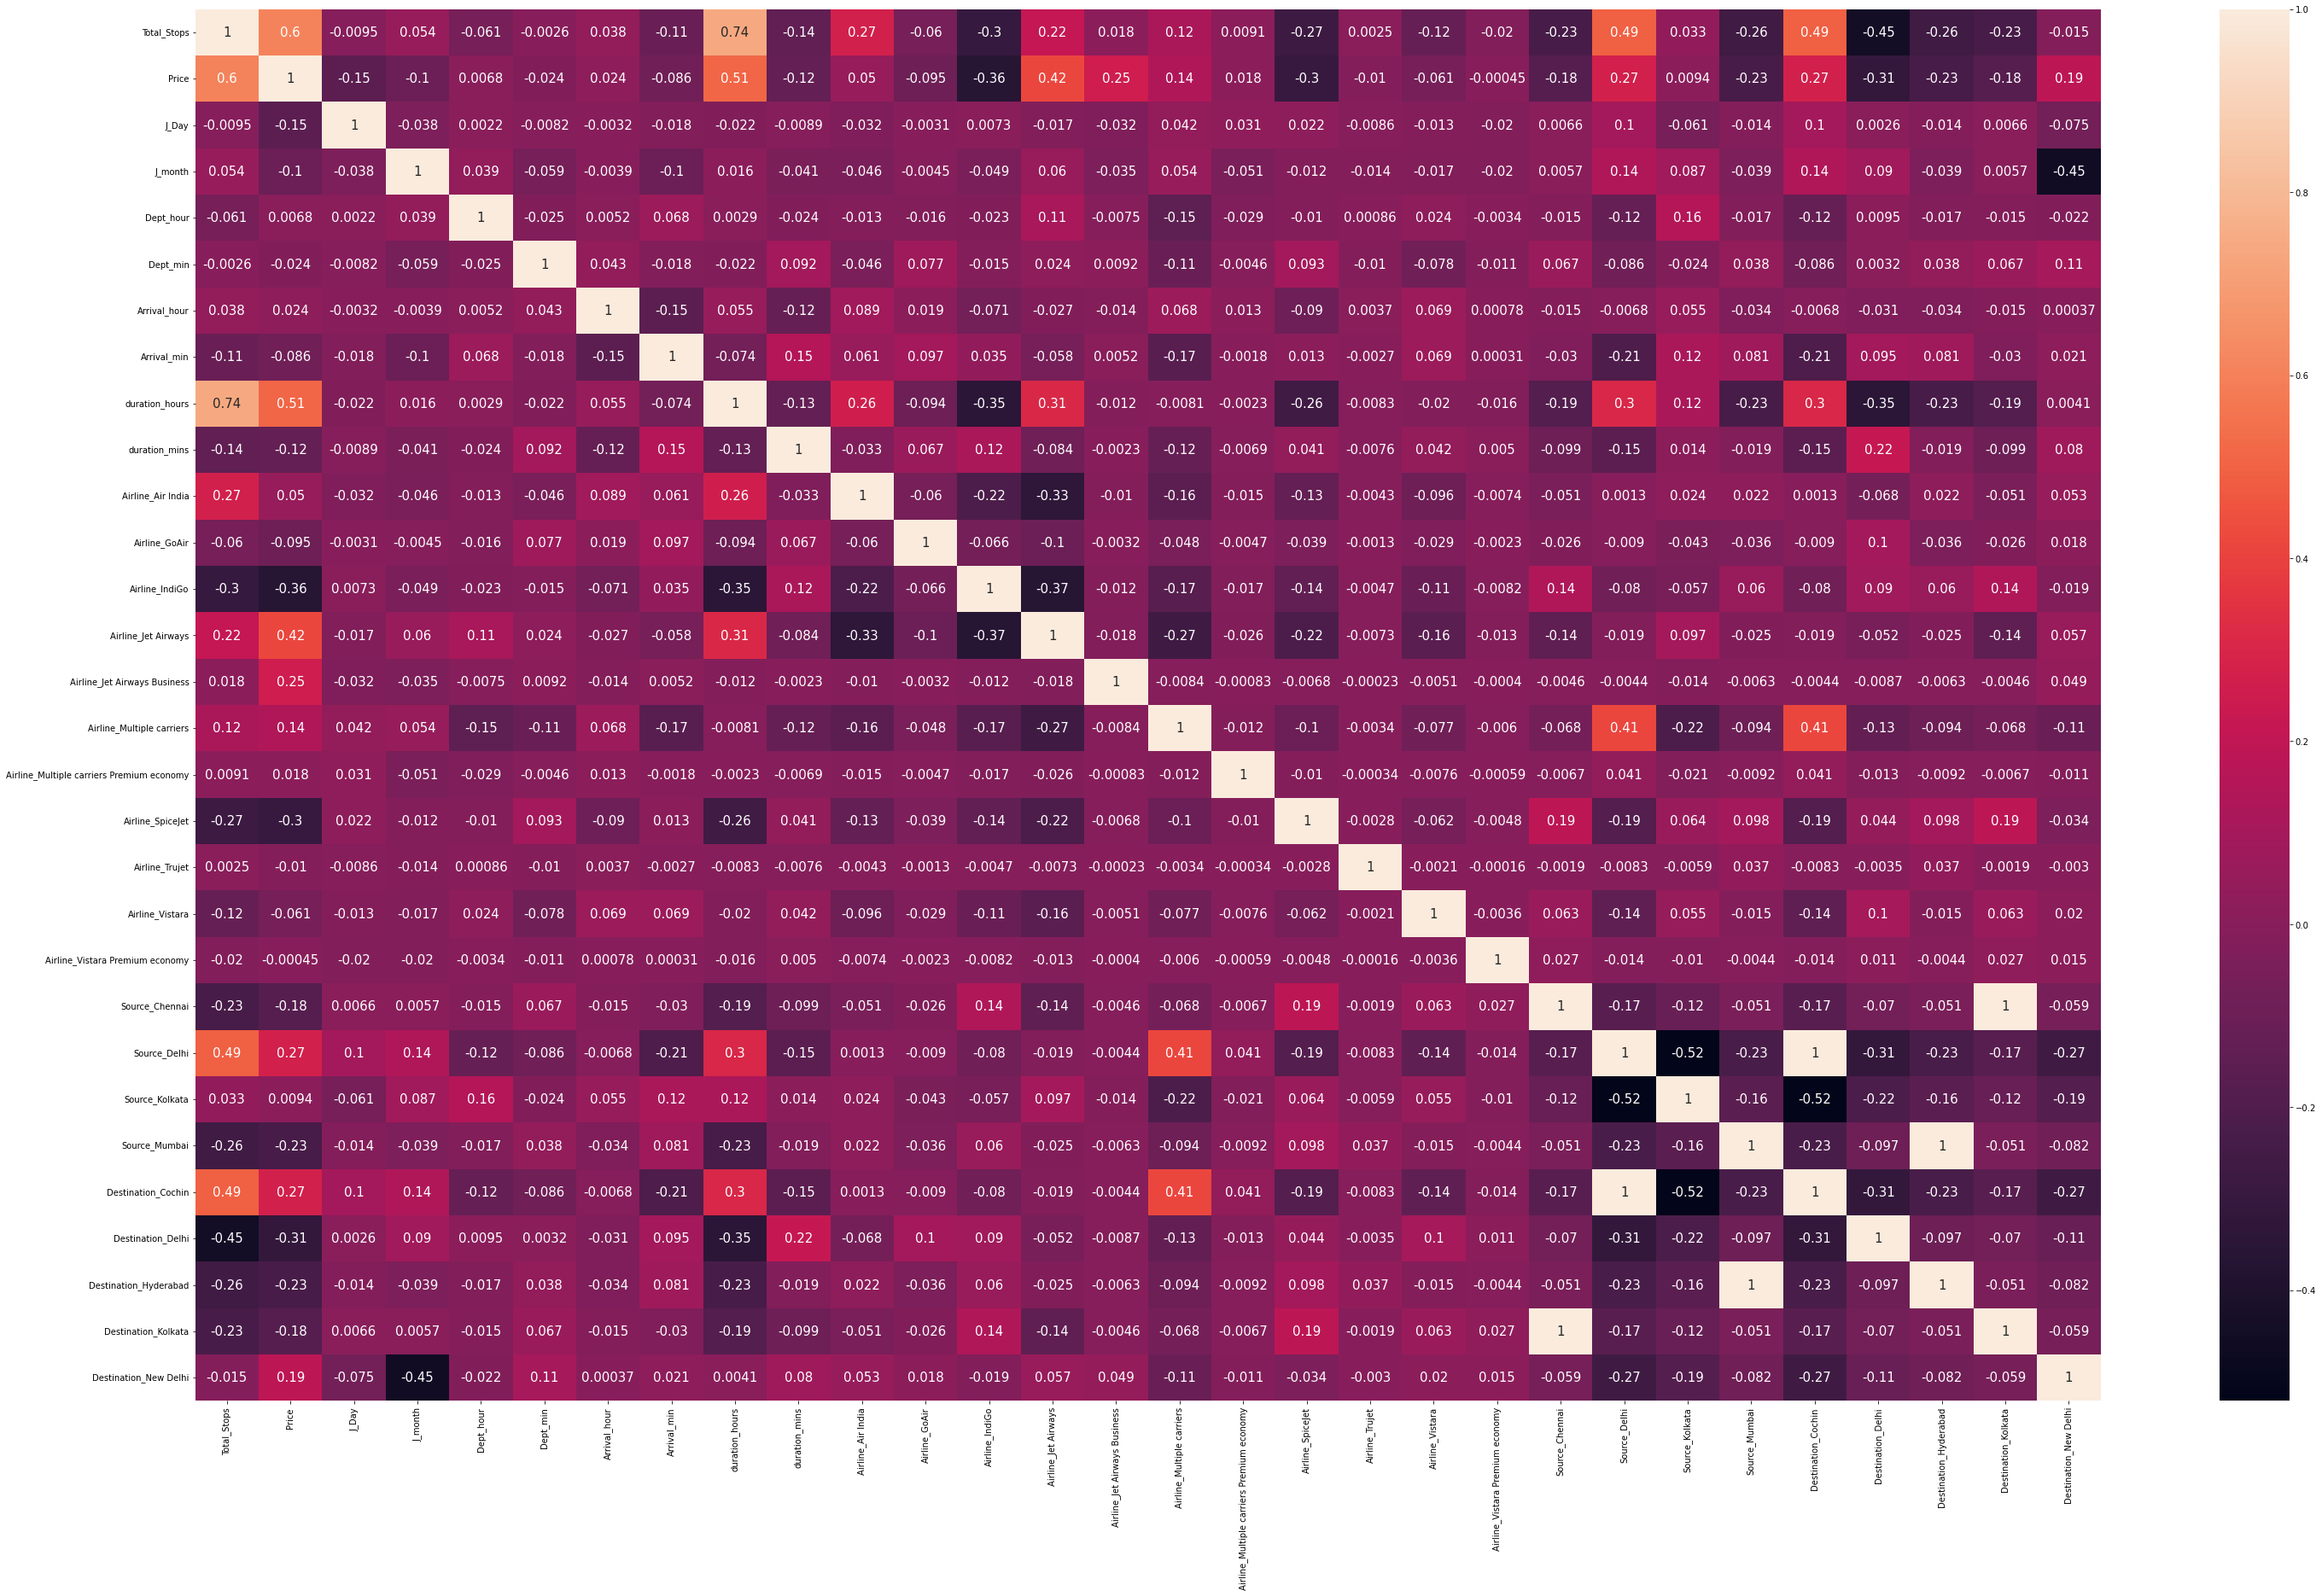

In [59]:
plt.figure(figsize=(50,30))

sns.heatmap(corr,annot=True,annot_kws={'size':15})
plt.show()

In [60]:
X=data.drop(columns=['Price'])
y=data['Price']

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

In [62]:
#x_train1=X
#x_test1=data_test
#y_train1=y
#y_test1=pd.read_csv('Sample_submission.csv')

In [63]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [64]:
y_pred = reg_rf.predict(x_test)

In [65]:
reg_rf.score(x_train, y_train)

0.9538622241303939

In [66]:
reg_rf.score(x_test, y_test)

0.8179898986591333

# ADA BOOST

In [67]:
from sklearn.ensemble import AdaBoostRegressor

In [68]:
ada=AdaBoostRegressor()

In [69]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [70]:
y_pred1=ada.predict(x_train)

In [71]:
from sklearn import metrics

In [72]:
accuracy=metrics.r2_score(y_train,y_pred1)
accuracy

0.502638212438286

In [73]:
y_test_pred=ada.predict(x_test)

In [74]:
accuracy=metrics.r2_score(y_test,y_test_pred)
accuracy

0.4238633652170002

# XGB REGRESSOR

In [75]:
import xgboost as xgb

In [76]:
xgb=xgb.XGBRegressor()

In [77]:
xgb.fit(x_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [78]:
y_pred3=xgb.predict(x_test)

In [79]:
from sklearn.metrics import r2_score

In [80]:
r2_score(y_test,y_pred3)

0.849476973929856

# CROSS VALIDATIO SCORE

In [ ]:
 from sklearn.model_selection import cross_val_score

CROSS VALIDATION SCORE ON XGB BOOST

In [82]:
scores = cross_val_score(xgb, X, y, cv=10)
scores

array([0.83695158, 0.82354418, 0.84145885, 0.85828832, 0.85898223,
       0.86888862, 0.84463198, 0.8638996 , 0.85805842, 0.83271811])

In [83]:
cross_val_score(xgb, X, y, cv=10).mean()

0.8487421890320557

CROSS VALIDATION SCORE ON RANDOM FOREST

In [84]:
scores = cross_val_score(reg_rf, X, y, cv=10)
scores

array([0.83349078, 0.80619734, 0.81379929, 0.82801169, 0.82705963,
       0.84179239, 0.80396081, 0.831071  , 0.79658799, 0.73827757])

In [85]:
cross_val_score(reg_rf, X, y, cv=10).mean()

0.8111843961285434

FROM ABOVE OBSERVATION XGB BOOST IS CHOOSEN BECAUSE ITS CROSS VALIDATION SCORE IS MORE ACCURATE

SAVING THE MODEL

In [94]:
filename='Flight_price_predication'
pickle.dump(xgb,open(filename,'wb'))
loaded_model=pickle.load(open(filename,'rb'))